#### Matrix inverse

(1) Generate $ n\times n $ random matrix

In [1]:
# import libraries and packages
import numpy as np
import time
import pandas as pd

def matrix_A(n):
    X = np.random.random((n, n))
    X_transpose = X.transpose()
    A = np.identity(n) + X_transpose@X
    return A

(2) show by defition that $ A = I + X^TX $ is symmetric and positive definite <br>
<br>
by definition:<br>
(i) $A$ is PD $\Leftrightarrow$ every eigenvalue of $A$ is positive <br>
(ii) if $x^{T}Ax > 0, \forall x\neq 0, \Rightarrow A$ is positive definite (PD) <br>
<br>

consider the identity matrix $I \in \mathbb{R}^{n \times n}$: <br>
$Iv = 1v, \forall v \in \mathbb{R}^{n}$ <br>
$ \Rightarrow$ the identity matrix has only one eigenvalue which is 1 <br>
$1>0 \Rightarrow$ the identity matrix $I$ is PD (by (i)) <br>
<br>
now consider $y^{T}Ay$ where $A = I + X^{T}X$ and $\forall y in \mathbb{R}^{n}$: <br>
$ \Rightarrow y^{T}Ay = y^{T}(I + X^{T}X)y = y^{T}Iy + (Xy)^{T}Xy $ <br
$ since y^{T}Iy > 0$ and $(Xy)^{T}Xy = $ norm of $Xy$ $\geq 0$ <br> 

(3) Plot a figure of log<sub>10</sub>(time) against $n$.

<AxesSubplot: xlabel='n', ylabel='log(time)'>

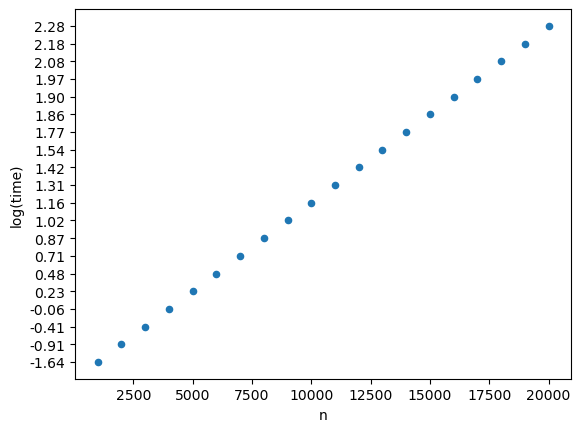

In [2]:
df = pd.DataFrame(columns=['n', 'log(time)'])

for n in range(1000,21000,1000):
    A = matrix_A(n)
    
    # time the operation
    start_time = time.time()
    B = np.linalg.inv(A)
    end_time = time.time()
    duration = end_time - start_time
    
    # store values in df
    log_duration = f'{np.log10(duration):.2f}'
    df_new = pd.DataFrame({'n': [n], 'log(time)': [log_duration]} )
    df = pd.concat([df, df_new], ignore_index=True)

df.plot(x='n', y='log(time)', kind='scatter')

(4) What is the largest $n$ that your device can handle? How long does it take to invert this large $n\times n$ matrix A?

My device (macbook air M2 chip) took ~ 2 min to invert a matrix of dimension $n = 20,000$. I expect the device to take be able to handle $n = 2\times 10^6$ (ie 100 times) before "crashing"

#### PCA iris dataset

(1) download dataset

In [3]:
# load iris dataset from skleanr
from sklearn import datasets
iris = datasets.load_iris()

(2) Transform feature of dataset and report per Table 1

In [4]:
# convert data to df with required features and column headers
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])

# convert target labels to names
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target']).astype({'target': int}) \
       .assign(species=lambda x: x['target'].map(dict(enumerate(iris['target_names']))))

# rename headers per assignment qn
df = df.rename(columns={'sepal length (cm)': 'sepal length', 'sepal width (cm)': 'sepal width',
                       'petal length (cm)': 'petal length', 'petal width (cm)':'petal width'})

# remove "target" column that is not required
del df['target']

# normalise data
df.iloc[:,0:-1] = df.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
df.head(3)

,sepal length,sepal width,petal length,petal width,species
0,-0.897674,1.015602,-1.335752,-1.311052,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,setosa


(3) Compute p x p covariance matrix and report its numerical values

In [5]:
sigma = df.cov(numeric_only=True)
sigma

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


(4) compute eigenvalue decomposition

In [6]:
from numpy.linalg import eig
values, Q = eig(sigma)
D = np.diag(values)
D

array([[2.91849782, 0.        , 0.        , 0.        ],
       [0.        , 0.91403047, 0.        , 0.        ],
       [0.        , 0.        , 0.14675688, 0.        ],
       [0.        , 0.        , 0.        , 0.02071484]])

In [7]:
Q_transpose = Q.transpose()
Q

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

<!-- (5) Give the first principal component. Recast the data onto the first principal component and plot the results -->

In [8]:
# first principal component
PC1 = Q[:,0]
PC1

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

<AxesSubplot: xlabel='PC1', ylabel='y-axis'>

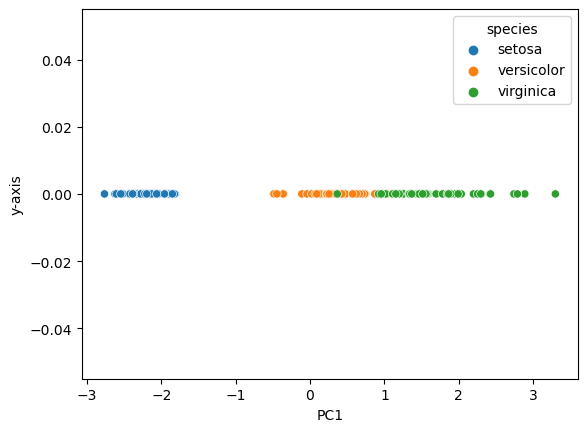

In [9]:
## recast data and plot onto the first pc

# recast onto PC1
df_PC1 = pd.DataFrame(df.iloc[:,0:4].to_numpy().dot(PC1), columns=["PC1"])

# create df with target on x-axis, and an arbitrary y=0
    # plots the 1-D data on a 2-D figure

df_PC1["species"] = df["species"]
df_PC1["y-axis"] = 0

# df_PC1.plot(x='PC1', y='y-axis', kind='scatter')

import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x="PC1", y="y-axis", data=df_PC1, hue="species")

(6) Give the first two principal component. Recast the data onto the first two principal component and plot the results

In [10]:
# first two principal component
PC2 = Q[:,0:2]
PC2

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

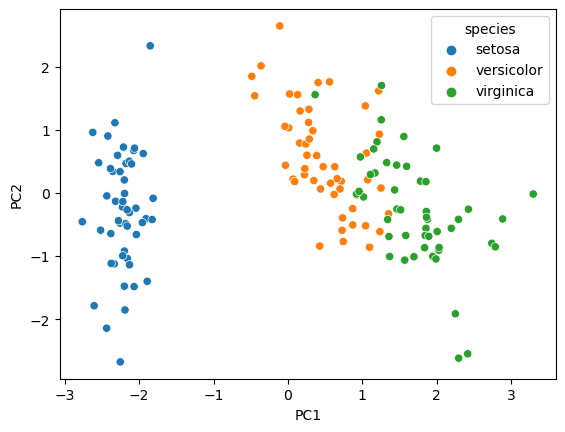

In [11]:
## recast data and plot onto the first two pc

# recast onto PC2
df_PC2 = pd.DataFrame(df.iloc[:,0:4].to_numpy().dot(PC2), columns=["PC1","PC2"])

# set axes and labels
df_PC2["species"] = df["species"]

sns.scatterplot(x="PC1", y="PC2", data=df_PC2, hue="species")